# Exercícios

### Para todos os desafios, insira legendas, rótulos dos eixos, título do gráfico.

### Resolva os 3 primeiros exercícios usando matplotlib e os 3 seguintes usando altair. O último, fica à seu critério

## 1) Utilizando o dataset Pokemon, crie uma função que receba o dataset e o atributo e retorne um histograma que mostre a distribuição do valor dos atributos “attack”, “defense”,”Sp.Atk”, “Sp.Def” e “Speed”. Insira uma linha indicando o valor médio do atributo

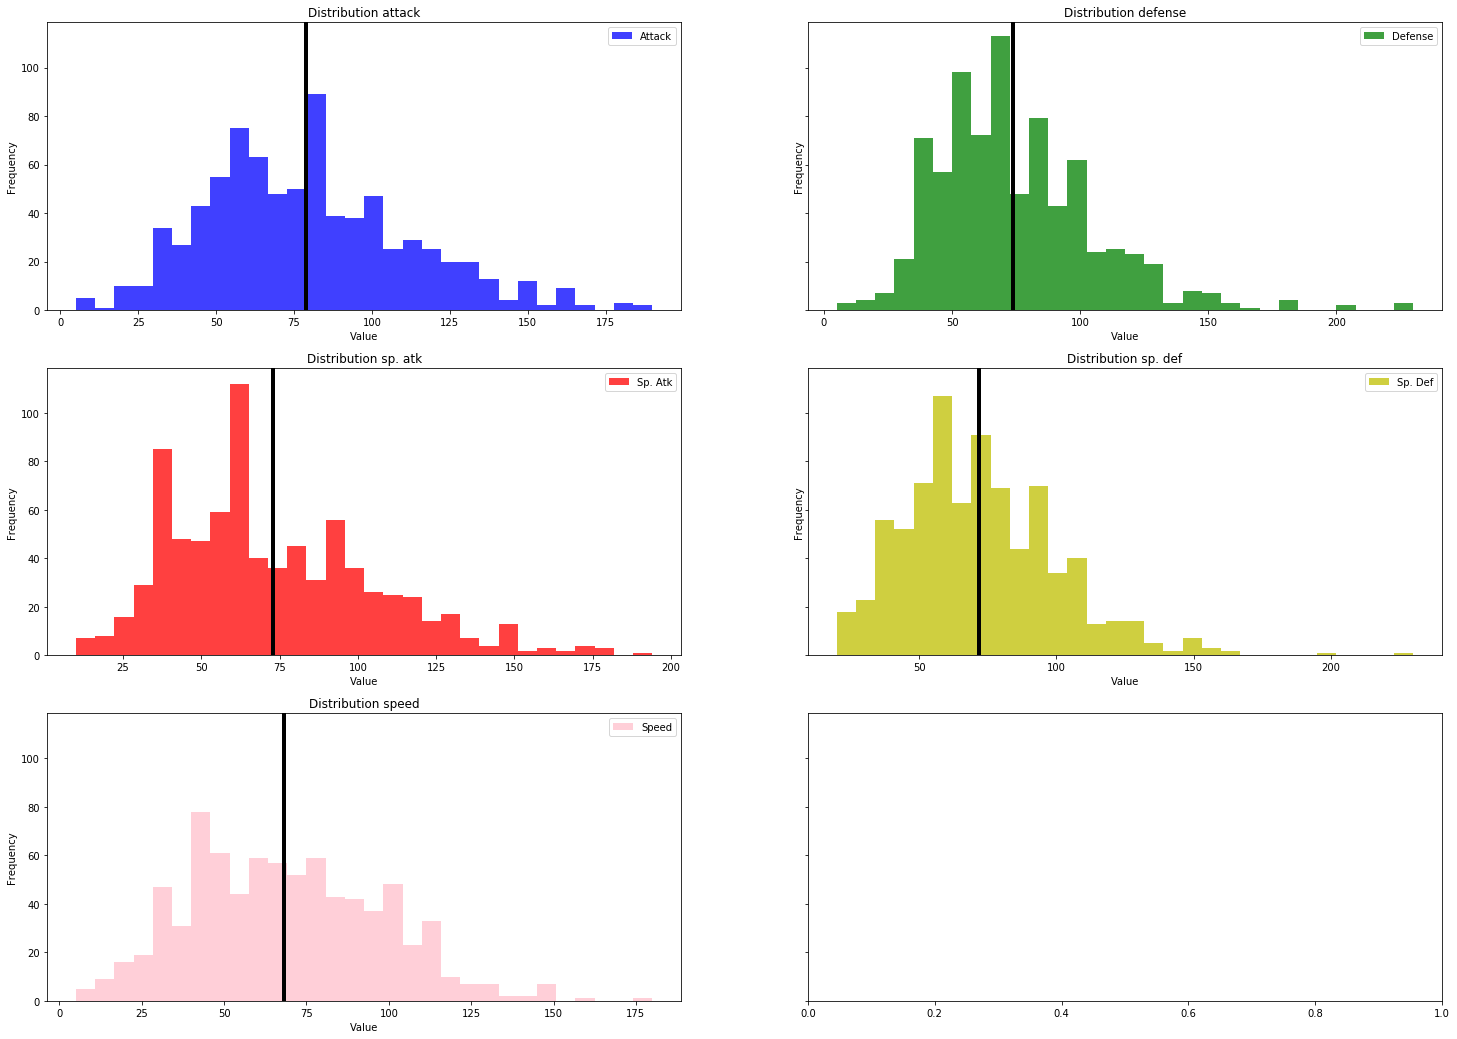

In [26]:
# resposta 1
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, sharey=True)
fig.set_size_inches(25, 18)
poke = pd.read_csv('Pokemon.csv')

axes[0,0].hist(poke['Attack'],  30, color='b', alpha=0.75, label='Attack')
axes[0,0].set_title('Distribution attack')
axes[0,0].set_xlabel('Value')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(x=poke['Attack'].mean(), linewidth=4, color='k')
axes[0,0].legend()

axes[0,1].hist(poke['Defense'],  30, color='g',  alpha=0.75, label='Defense')
axes[0,1].set_title('Distribution defense')
axes[0,1].set_xlabel('Value')
axes[0,1].set_ylabel('Frequency')
axes[0,1].axvline(x=poke['Defense'].mean(), linewidth=4, color='k')
axes[0,1].legend()

axes[1,0].hist(poke['Sp. Atk'],  30, color='r',  alpha=0.75, label='Sp. Atk')
axes[1,0].set_title('Distribution sp. atk')
axes[1,0].set_xlabel('Value')
axes[1,0].set_ylabel('Frequency')
axes[1,0].axvline(x=poke['Sp. Atk'].mean(), linewidth=4, color='k')
axes[1,0].legend()

axes[1,1].hist(poke['Sp. Def'],  30, color='y',  alpha=0.75, label='Sp. Def')
axes[1,1].set_title('Distribution sp. def')
axes[1,1].set_xlabel('Value')
axes[1,1].set_ylabel('Frequency')
axes[1,1].axvline(x=poke['Sp. Def'].mean(), linewidth=4, color='k')
axes[1,1].legend()

axes[2,0].hist(poke['Speed'],  30, color='pink',  alpha=0.75, label='Speed')
axes[2,0].set_title('Distribution speed')
axes[2,0].set_xlabel('Value')
axes[2,0].set_ylabel('Frequency')
axes[2,0].axvline(x=poke['Speed'].mean(), linewidth=4, color='k')
axes[2,0].legend()

plt.show()

## 2) Usando o dataset Pokemon, crie um scatter plot comparando ataque (eixo x) e defesa (eixo y) de pokemons dos tipos Fire e Water. 

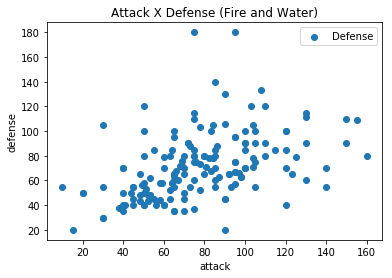

In [3]:
# resposta 2
poke_filtered = poke[(poke['Type 1'] == 'Fire') | (poke['Type 1'] == 'Water')]

attack = poke_filtered['Attack']
defense = poke_filtered['Defense']

plt.scatter(attack, defense)

plt.xlabel('attack')
plt.ylabel('defense')
plt.title("Attack X Defense (Fire and Water)")

plt.legend()
plt.show()


## 3) Usando o dataset Pokemons, crie um gráfico de linha para comparar a quantidade de pokemons de cada tipo ao longo das gerações

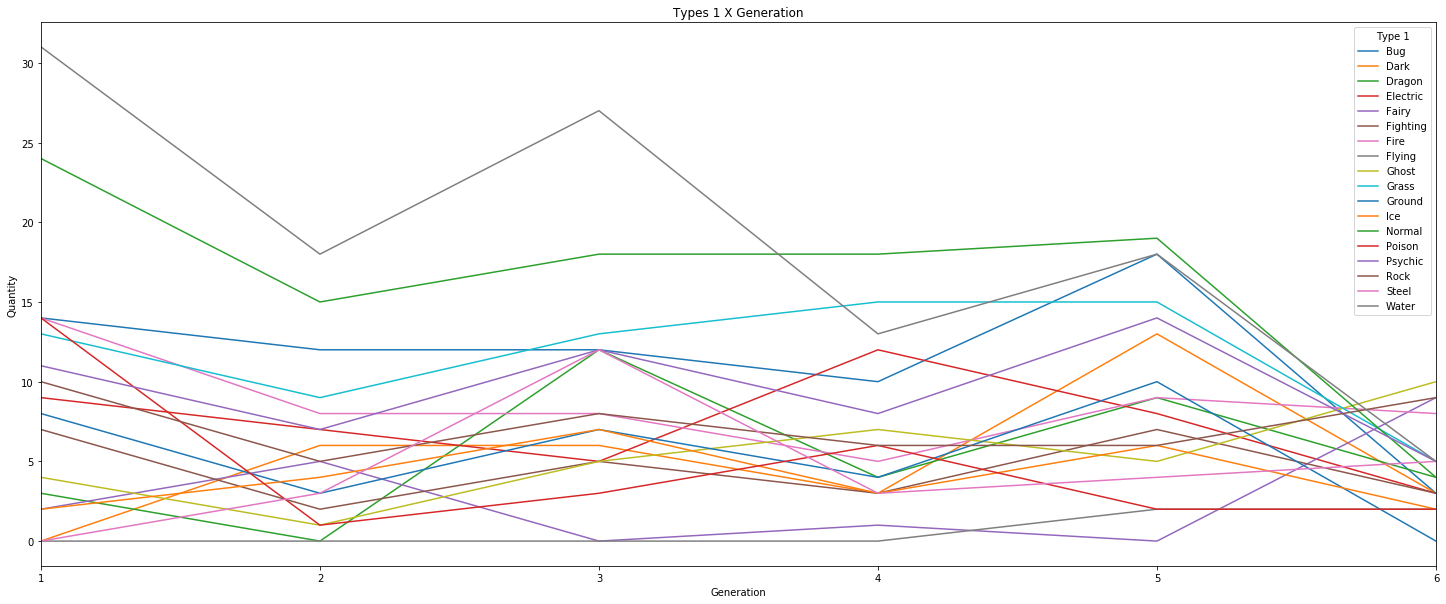

In [4]:
# resposta 3
fig, ax1 = plt.subplots(1, 1, sharey=True)
fig.set_size_inches(25, 10)

poke.groupby(['Generation', 'Type 1'])['#'].count().unstack().apply(lambda x: x.fillna(0)).plot(ax=ax1)

ax1.set_title('Types 1 X Generation')
ax1.set_ylabel('Quantity')
plt.show()

## 4) Utilizando o dataset airports (var = data.airports()):
    -> Faça um rank bar dos 5 primeiros estados dos EUA com maior número de aeroportos


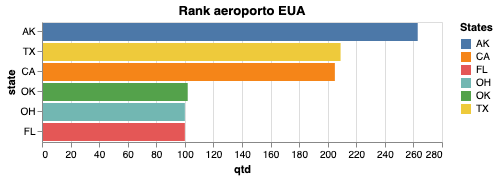

In [109]:
# resposta 4
from vega_datasets import data
import altair as alt

var = data.airports()

alt.Chart(var, title='Rank aeroporto EUA').transform_aggregate(
    qtd='count()',
    groupby=['state']
).transform_window(
    rank='rank(qtd)',
    sort=[alt.SortField('qtd', order='descending')]
).transform_filter(
    alt.datum.rank <= 5
).mark_bar().encode(
    y=alt.Y('state:N', sort=alt.EncodingSortField(field="qtd", order='descending')),
    x='qtd:Q',
    color=alt.Color('state:N', title='States')
)

## 5) Utilizando o conjunto de dados íris (var = data.íris()):
    -> Crie dois gráficos scatter, chart1 e chart2. Para o chart1, x=petalLenght, y=petalWidth. Para o chart2, x = sepalLenght, y=sepalWidth.

    -> Componha esses gráficos numa única apresentação. Para isso, faça chart1 | chart2


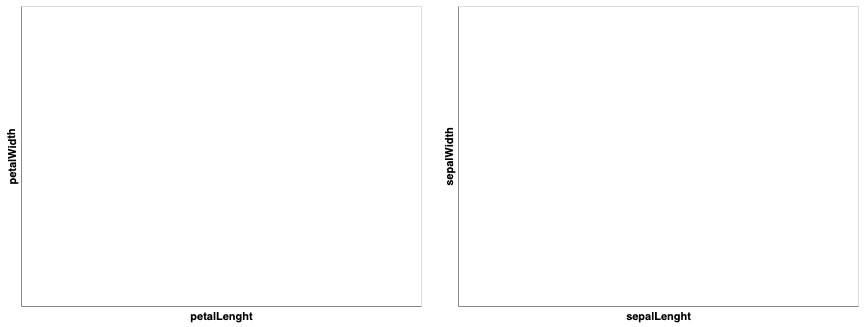

In [21]:
# resposta 5
var = data.iris()

chart1 = alt.Chart(var).mark_point().encode(
    x='petalLenght:Q',
    y='petalWidth:Q'
)

chart2 = alt.Chart(var).mark_point().encode(
    x='sepalLenght:Q',
    y='sepalWidth:Q'
)

chart1 | chart2

## 6) Usando o dataset Pokemon, crie um rank bar que mostre o rank para Type 1

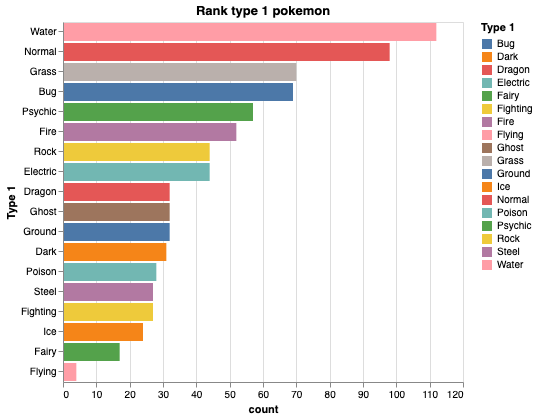

In [110]:
# resposta 6
alt.Chart(poke, title='Rank type 1 pokemon').mark_bar().encode(
    x='count:Q',
    y=alt.Y('Type 1:N',
        sort=alt.SortField(field='count', order='descending')
    ),
    color='Type 1:N'
).transform_aggregate(
    count='count()',
    groupby=['Type 1']
).transform_window(
    window=[{'op': 'rank', 'as': 'rank'}],
    sort=[{'field': 'count', 'order': 'descending'}]
)

## 7) Utilizando o dataset Pokemon, crie um gráfico de barras que mostre, para cada geração, a proporção de pokemons Legendários e aqueles que não são legendários. Use stacked bar. 

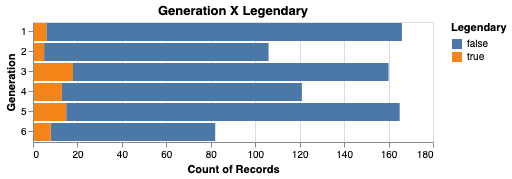

In [111]:
# resposta 7
alt.Chart(poke, title='Generation X Legendary').mark_bar().encode(
    x='count(Legendary):Q',
    y=alt.Y('Generation:N',
        sort=alt.SortField(field='count', order='ascending')
    ),
    color='Legendary:N'
)